# Importing Libraries

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [2]:
path=r'C:\Users\sahoo\Desktop\Models\Corona mask detector\dataset'
labels=['with_mask','without_mask']
img_cube=[]
for i in os.listdir(path):
    final_path=path+'\\'+i
    label=labels.index(i)
    for j in os.listdir(final_path):
        img=cv2.imread(final_path+'\\'+j,1)
        img=cv2.resize(img,(200,200))
        img_cube.append([img,label])
        
len(img_cube) ,img_cube[0][0]

(1376,
 array([[[ 19,   3,   8],
         [ 19,   3,   8],
         [ 19,   3,   8],
         ...,
         [ 30,  14,  21],
         [ 30,  15,  21],
         [ 31,  15,  22]],
 
        [[ 24,   8,  12],
         [ 24,   8,  12],
         [ 24,   8,  12],
         ...,
         [ 35,  20,  24],
         [ 36,  21,  25],
         [ 37,  22,  26]],
 
        [[ 25,   5,  10],
         [ 25,   5,  10],
         [ 25,   5,  10],
         ...,
         [ 28,  14,  16],
         [ 29,  15,  18],
         [ 30,  16,  18]],
 
        ...,
 
        [[ 80,   5, 175],
         [ 77,   5, 176],
         [ 73,   5, 175],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[ 75,   5, 168],
         [ 71,   4, 166],
         [ 66,   4, 164],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[ 71,   7, 161],
         [ 65,   4, 157],
         [ 61,   4, 155],
         ...,
         [  0,   0,  

Label:  1


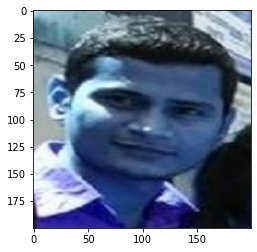

Label:  0


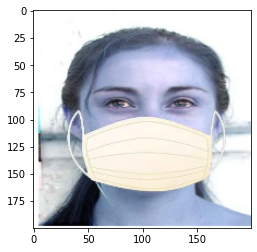

In [3]:
plt.imshow(img_cube[1][0])
print("Label: ",img_cube[1][1])
plt.show()

plt.imshow(img_cube[1000][0])
print("Label: ",img_cube[1000][1])
plt.show()


# Split dataset into train and test

In [4]:
features,target=([] for i in range(2))
for i,j in img_cube:
    features.append(i)
    target.append(j)
features=np.array(features)
features=features/255.0
target=np.array(target)
x_train,x_test,y_train,y_test=train_test_split(features, target, test_size=0.25, random_state=42)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(1032, 200, 200, 3) (344, 200, 200, 3)
(1032,) (344,)


In [5]:
features[0]

array([[[0.0745098 , 0.01176471, 0.03137255],
        [0.0745098 , 0.01176471, 0.03137255],
        [0.0745098 , 0.01176471, 0.03137255],
        ...,
        [0.11764706, 0.05490196, 0.08235294],
        [0.11764706, 0.05882353, 0.08235294],
        [0.12156863, 0.05882353, 0.08627451]],

       [[0.09411765, 0.03137255, 0.04705882],
        [0.09411765, 0.03137255, 0.04705882],
        [0.09411765, 0.03137255, 0.04705882],
        ...,
        [0.1372549 , 0.07843137, 0.09411765],
        [0.14117647, 0.08235294, 0.09803922],
        [0.14509804, 0.08627451, 0.10196078]],

       [[0.09803922, 0.01960784, 0.03921569],
        [0.09803922, 0.01960784, 0.03921569],
        [0.09803922, 0.01960784, 0.03921569],
        ...,
        [0.10980392, 0.05490196, 0.0627451 ],
        [0.11372549, 0.05882353, 0.07058824],
        [0.11764706, 0.0627451 , 0.07058824]],

       ...,

       [[0.31372549, 0.01960784, 0.68627451],
        [0.30196078, 0.01960784, 0.69019608],
        [0.28627451, 0

In [6]:
x_test.shape

(344, 200, 200, 3)

# Train Neural Network model

In [7]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=x_train.shape[1:],activation="relu"))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(256,(3,3),activation="relu"))
model.add(MaxPooling2D((3,3)))
model.add(Flatten()) 
model.add(Dense(2048,activation="relu"))
model.add(Dense(1024,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(2,activation="sigmoid"))
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history=model.fit(features,target,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
43/43 [==============================] - 76s 2s/step - loss: 0.4321 - accuracy: 0.7769 - val_loss: 0.0822 - val_accuracy: 0.9738
Epoch 2/20
43/43 [==============================] - 72s 2s/step - loss: 0.1650 - accuracy: 0.9578 - val_loss: 0.1047 - val_accuracy: 0.9651
Epoch 3/20
43/43 [==============================] - 72s 2s/step - loss: 0.0717 - accuracy: 0.9753 - val_loss: 0.0272 - val_accuracy: 0.9855
Epoch 4/20
43/43 [==============================] - 65s 2s/step - loss: 0.0512 - accuracy: 0.9826 - val_loss: 0.0367 - val_accuracy: 0.9826
Epoch 5/20
43/43 [==============================] - 64s 1s/step - loss: 0.0449 - accuracy: 0.9862 - val_loss: 0.0290 - val_accuracy: 0.9884
Epoch 6/20
43/43 [==============================] - 64s 1s/step - loss: 0.0290 - accuracy: 0.9862 - val_loss: 0.0434 - val_accuracy: 0.9767
Epoch 7/20
43/43 [==============================] - 64s 1s/step - loss: 0.0291 - accuracy: 0.9869 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 8/20
43/43 [==

In [8]:
# Evaluating the Predictions on the Model

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 6.580661647603847e-06
Test accuracy: 1.0


In [9]:
y_pred=[]
for i in range(len(x_test)):
        y_pred.append(model.predict(x_test[i].reshape(1,200,200,3)))
        
len(y_test),len(y_pred)

(344, 344)

In [10]:
y_pred[:10]  #to get max probability value we use argmax

[array([[2.3743525e-12, 1.0000000e+00]], dtype=float32),
 array([[5.673604e-15, 1.000000e+00]], dtype=float32),
 array([[1.0000000e+00, 2.7099342e-17]], dtype=float32),
 array([[9.3084016e-18, 1.0000000e+00]], dtype=float32),
 array([[9.568577e-10, 1.000000e+00]], dtype=float32),
 array([[2.8412617e-12, 1.0000000e+00]], dtype=float32),
 array([[3.4993686e-15, 1.0000000e+00]], dtype=float32),
 array([[8.644249e-12, 1.000000e+00]], dtype=float32),
 array([[2.241965e-10, 1.000000e+00]], dtype=float32),
 array([[2.8916361e-12, 1.0000000e+00]], dtype=float32)]

In [11]:
#as prediction value returning 3 values array but we want prediction that shows a particular class (ie; 0 or 1 or 2)

y_pred2=[]
for i in range(len(x_test)):
    y_pred2.append(np.argmax(y_pred[i],axis=1)) #it will take index value for which value is maxiumum of that array
y_pred2[:10]

[array([1], dtype=int64),
 array([1], dtype=int64),
 array([0], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64),
 array([1], dtype=int64)]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 66, 66, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

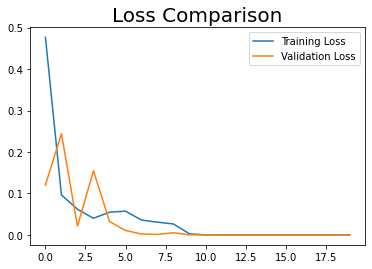

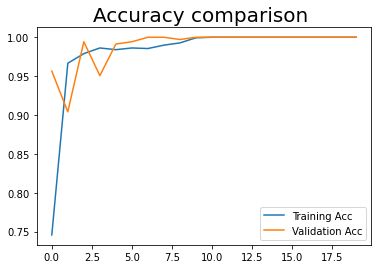

In [22]:
model.summary()

print("*-*"*40)
print("Accuracy Found: ",accuracy_score(y_test,np.array(y_pred2)))
#using adam accuracy was 83%
#using adadelta accuracy was 89%
print("*-*"*40)
print("Confusion Matrix:\n",confusion_matrix(y_test,np.array(y_pred2))) 
print("*-*"*40)
print("Classification Report:\n",classification_report(y_test,np.array(y_pred2)))
print("*-*"*40)

#plt.figure(figsize=(15,9))
plt.title('Loss Comparison',fontsize=20)
plt.plot(history.history['loss'],)
plt.plot(history.history['val_loss'])
plt.legend(['Training Loss','Validation Loss'])
plt.show()


#plt.figure(figsize=(15,9))
plt.title('Accuracy comparison ',fontsize=20)
plt.plot(history.history['accuracy'],)
plt.plot(history.history['val_accuracy'])
plt.legend(['Training Acc','Validation Acc'])
plt.show()

In [23]:
model.save("Corona-Mask-detector.h5")

In [3]:
def getClassName(n):
    if n==0: return 'with mask'
    else: return 'without mask!'
    
cap=cv2.VideoCapture(0)
cap.set(3,640)
cap.set(4,480)
cap.set(10,180)

True

In [3]:
font = cv2.FONT_HERSHEY_SIMPLEX
while True:
    success,imgOriginal=cap.read()
    img=np.asarray(imgOriginal)
    img=cv2.resize(img,(200,200))
    #img=preprocessing(img)
    #cv2.imshow("Processed Image",img)
    img=img.reshape(1,200,200,3)
    cv2.putText(imgOriginal,"Class: ",(20,35),font,0.75,(0,0,255),2,cv2.LINE_AA)
    cv2.putText(imgOriginal,"Probability: ",(20,75),font,0.75,(0,0,255),2,cv2.LINE_AA)
    model=load_model("Corona-Mask-detector.h5")
    predictions=model.predict(img)
    classIndex=model.predict_classes(img)
    probabilityValue=np.amax(predictions)
    if probabilityValue>0.60:
        cv2.putText(imgOriginal,str(classIndex) + " "+ str(getClassName(classIndex)),(120,35),font,0.75,(0,0,255),2,cv2.LINE_AA)
        cv2.putText(imgOriginal,str(round(probabilityValue*100,2)) + "%",(120,75),font,0.75,(0,0,255),2,cv2.LINE_AA)
    cv2.imshow("Result",imgOriginal)
    if cv2.waitKey(1) and 0xFF==ord("q"):
        break

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


KeyboardInterrupt: 